In [1]:
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# [로지스틱 회귀 (Logistic Regression)](https://wikidocs.net/57805)

## 시그모이드 함수 (Sigmoid function)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### W = 1, b = 0인 그래프

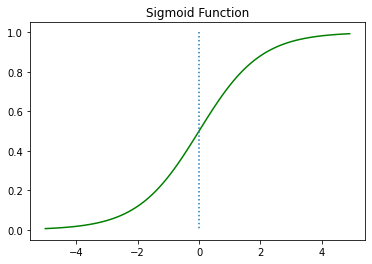

In [5]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

_ = plt.plot(x, y, 'g')
_ = plt.plot([0,0],[1,0], ':') # 가운데 점선 추가
_ = plt.title('Sigmoid Function')
_ = plt.show()

## W값의 변화에 따른 경사도의 변화

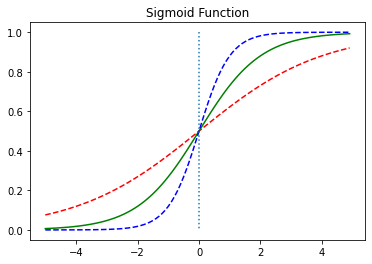

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

_ = plt.plot(x, y1, 'r', linestyle='--') # W = 0.5
_ = plt.plot(x, y2, 'g') # W = 1
_ = plt.plot(x, y3, 'b', linestyle='--') # W = 2
_ = plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
_ = plt.title('Sigmoid Function')
plt.show()

- W의 값에 따라 그래프의 경사도가 변함
- 앞서 선형 회귀에서 가중치 W는 직선의 기울기를 의미했지만, 여기서는 그래프의 경사도를 결정함
- W의 값이 커지면 경사가 커지고 W의 값이 작아지면 경사가 작아짐

### b값의 변화에 따른 좌, 우 이동

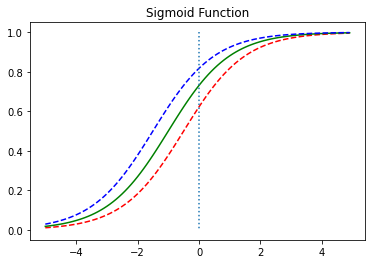

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

_ = plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
_ = plt.plot(x, y2, 'g') # x + 1
_ = plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
_ = plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
_ = plt.title('Sigmoid Function')
plt.show()

### 시그모이드 함수를 이용한 분류
- 시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴함
- 시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용할 수 있음
    - 예를 들어 임계값을 0.5라고 정해보자 
    - 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)으로 판단하도록 할 수 있음
    - 이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 50%보다 낮으면 해당 레이블이 아니라고 판단함

## 파이토치로 로지스틱 회귀 구현하기
- 이제 파이토치로 로지스틱 회귀 중에서도 다수의 x로부터 y를 예측하는 다중 로지스틱 회귀를 구현해보기

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [16]:
# 다중 로지스틱 회귀.. 훈련 데이터를 행렬로 선언하고, 이후 행렬 연산으로 가설 세울 것임!
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [19]:
W = torch.zeros((2, 1), requires_grad=True) # 크기 : 2 x 1
b = torch.zeros(1, requires_grad=True)

# 행렬 연산을 사용한 가설식 
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

- 앞서 W와 b는 `torch.zeros`를 통해 전부 0으로 초기화 된 상태임
- 이 상태에서 예측값을 출력해보자

In [21]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


- 실제값 y_train과 크기가 동일한 6 × 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5임


- 사실 가설식을 좀 더 간단하게도 구현할 수 있음
- 이미 PyTorch에서는 시그모이드 함수를 이미 구현하여 제공하고 있기 때문임
- 다음은 `torch.sigmoid`를 사용하여 좀 더 간단히 구현한 가설식임

In [23]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis) # W, b가 0으로 초기화 된 상태

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


- 앞선 결과와 동일하게 y_train과 크기가 동일한 6 × 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5임


- 이제 아래의 비용 함수값 즉, 현재 예측값과 실제값 사이의 cost를 구해볼 것임

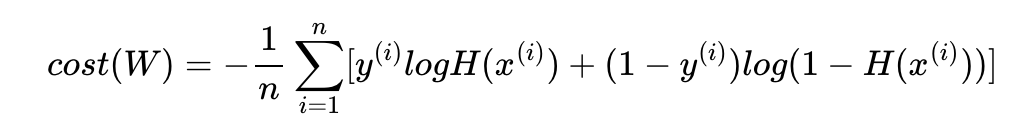

- 우선, 현재 예측값과 실제값을 출력해보자

In [24]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


현재 총 6개의 원소가 존재하지만 하나의 샘플 즉, 하나의 원소에 대해서만 오차를 구하는 식을 작성해보면..

In [25]:
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

모든 원소에 대해 오차를 구해보면..

In [26]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


전체 오차에 대한 평균을 구하면..

In [27]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


- 지금까지 비용 함수의 값을 직접 구현하였는데, 사실 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현해서 제공하고 있음
- 사용 방법은 `torch.nn.functional as F`와 같이 임포트 한 후에 `F.binary_cross_entropy(예측값, 실제값)`과 같이 사용하면 됨

In [28]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

- 동일하게 cost가 0.6931이 출력되는 것을 볼 수 있음
- 모델의 훈련 과정까지 추가한 전체 코드는 아래와 같음

In [29]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

epochs = 1000
for epoch in range(epochs+1):
    
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


- 훈련했던 훈련 데이터를 그대로 입력으로 사용했을 때 제대로 예측하는지 확인해보기
- 현재 훈련된 상태의 W와 b를 가지고 예측값을 출력해보면..

In [30]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


- 현재 위 값들은 0과 1 사이의 값을 가지고 있음
- 이 값이 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력하기

In [31]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


- 실제값은 [[0], [0], [0], [1], [1], [1]]이므로 이는 결과적으로 False, False, False, True, True, True와 동일함
- 즉, 기존의 실제값과 동일하게 예측함
- 훈련이 된 후의 W와 b의 값을 출력해보면..

In [32]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


# [nn.Module로 구현하는 로지스틱 회귀](https://wikidocs.net/58686)